In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import fitz  # PyMuPDF
import uuid # for generating unique identifiers for each paper

In [1]:
# Base path to folder where output files will be stored
output_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/finals'

# Base path to folders 
base_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/'

# Path to the MICCAI 2023 pdfs
pdf_path = base_path + 'miccai_2023/'

# Path to the MICCAI 2023 database of all 730 papers and their metadata
database_path = base_path + 'databases/'

In [16]:
def save_to_csv(df, path, title):
    df.to_csv(path + title + '.csv', index=True)

In [43]:
filename_agg_binary_df = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/finalsagg_columns_binary_values.csv'
filename_agg_counts_df = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/finalsagg_counts.csv'

In [44]:
binary_df = pd.read_csv(filename_agg_binary_df)
binary_df.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
binary_df

,title,age_,gender_,geolocation_,social factors,etnicity_,bias_,fairness_
0,3D Arterial Segmentation via Single 2D Project...,0,1,0,0,0,0,1
1,3D Mitochondria Instance Segmentation with Spa...,0,0,0,0,0,0,1
2,A Spatial-Temporal Deformable Attention Based ...,0,0,0,0,0,0,1
3,A Spatial-Temporally Adaptive PINN Framework f...,1,1,1,0,0,0,1
4,A Texture Neural Network to Predict the Abnorm...,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
184,WeakPolyp: You only Look Bounding Box for Poly...,0,0,0,0,0,1,0
185,Weakly-Supervised Positional Contrastive Learn...,1,0,1,0,0,0,1
186,X2Vision: 3D CT Reconstruction from Biplanar X...,0,0,0,0,0,0,1
187,YONA: You Only Need One Adjacent Reference-Fra...,0,0,0,0,0,0,1


In [45]:
agg_counts_df = pd.read_csv(filename_agg_counts_df)
agg_counts_df.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
agg_counts_df

,title,age_,gender_,geolocation_,social factors,etnicity_,bias_,fairness_
0,3D Arterial Segmentation via Single 2D Project...,0,6,0,0,0,0,6
1,3D Mitochondria Instance Segmentation with Spa...,0,0,0,0,0,0,4
2,A Spatial-Temporal Deformable Attention Based ...,0,0,0,0,0,0,1
3,A Spatial-Temporally Adaptive PINN Framework f...,4,12,4,0,0,0,4
4,A Texture Neural Network to Predict the Abnorm...,3,0,3,0,0,0,12
...,...,...,...,...,...,...,...,...
184,WeakPolyp: You only Look Bounding Box for Poly...,0,0,0,0,0,30,0
185,Weakly-Supervised Positional Contrastive Learn...,3,0,3,0,0,0,18
186,X2Vision: 3D CT Reconstruction from Biplanar X...,0,0,0,0,0,0,1
187,YONA: You Only Need One Adjacent Reference-Fra...,0,0,0,0,0,0,2


In [46]:
# Plotting the number of category-related keywords in papers 
def plot_category(category, df):
    df[category].value_counts().plot(kind='bar')
    plt.title('Number of Papers Discussing ' + category)
    plt.xlabel('Mentions of ' + category + '-Related Keywords')
    plt.ylabel('Number of Papers')
    plt.show()

In [52]:
# Subplotting the number of category-related keywords in papers
def subplot_categories_binary(categories_to_plot, agg_results_df):
    # Define the number of rows and columns for the subplots based on the number of categories
    num_categories = len(categories_to_plot)
    num_cols = 3  # Choose the number of columns for your subplot grid
    num_rows = num_categories // num_cols + (num_categories % num_cols > 0)

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 3 * num_rows))  # Adjust figsize as necessary
    axs = axs.flatten()  # Flatten the array of axes for easier iteration

    total_papers = len(agg_results_df)  # The total number of papers
    
    # Plot a bar plot for each specified category
    for i, category in enumerate(categories_to_plot):
        # Create the bar plot on the appropriate subplot
        # Note: This assumes each entry in these columns is a count. If not, adjust the plotting code accordingly.
        agg_results_df[category].value_counts().sort_index().plot(kind='bar', ax=axs[i], title=category.capitalize(), color='skyblue')
        axs[i].set_xlabel('Mentions of ' + category + '-related keywords')
        axs[i].set_xticks(ticks=[0, 1], labels=['No', 'Yes']) # Customize the x-axis tick labels

        axs[i].set_ylabel('Number of Papers')
        axs[i].set_ylim(0, 200)  # Adjust y-axis limits as necessary
        axs[i].set_title('Number of papers discussing ' + '|' + category + '|', fontsize=10, fontweight='bold', color='white', loc='center', pad=10, weight='bold')
    
        # Add a horizontal line at the total number of papers
        axs[i].axhline(y=total_papers, color='r', linestyle='--', label='papers in total')

        # Add legend to the subplot
        axs[i].legend(loc='lower left', fontsize=8)

    # Hide any unused subplot axes
    for j in range(i + 1, num_rows * num_cols):
        axs[j].set_visible(False)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

In [54]:
# Specify the categories you want to plot
categories_to_plot = ['age_', 'gender_', 'geolocation_', 'social factors', 'etnicity_', 'bias_', 'fairness_']

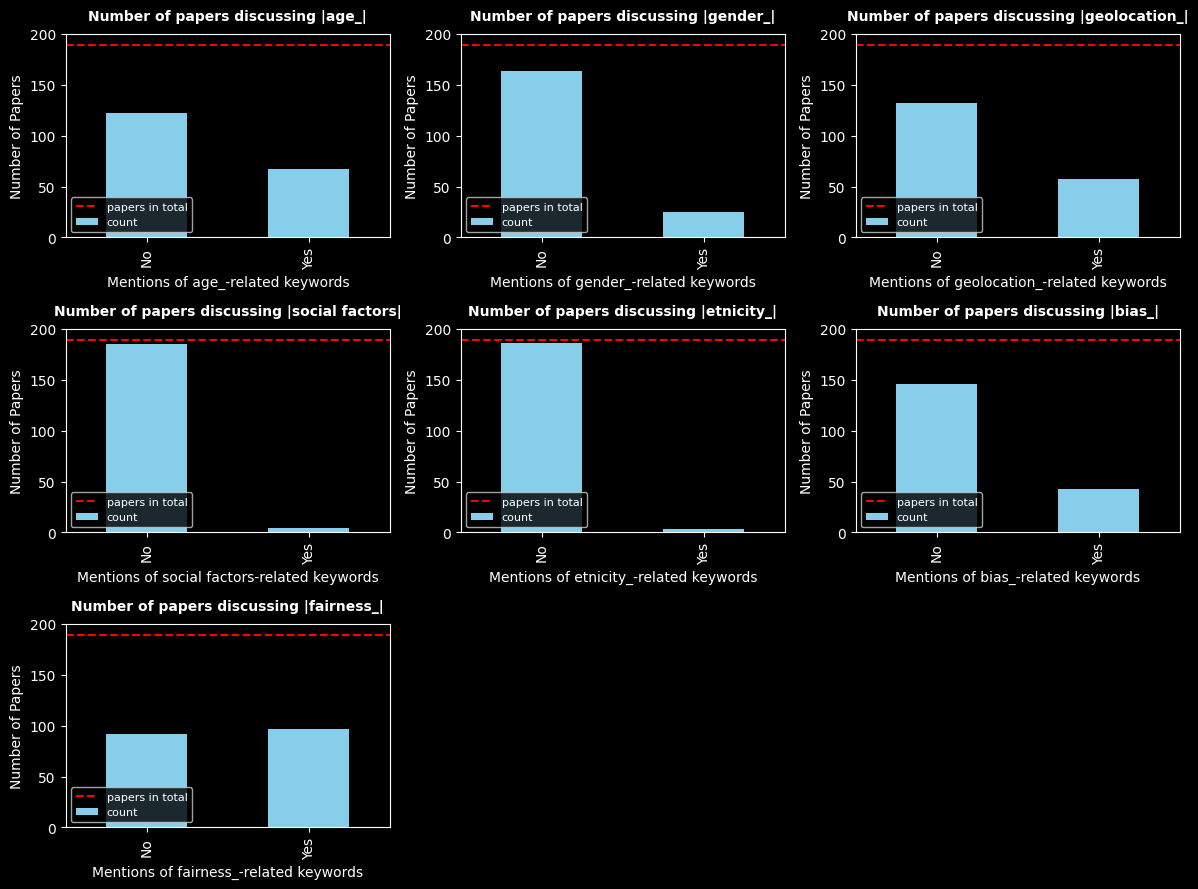

In [55]:
subplot_categories_binary(categories_to_plot, binary_df)

In [65]:
def plot_category_percentage_binary(df):    
    # Drop non-category columns
    df_categories = df.drop(['title'], axis=1)

    # Calculate the sum for each category
    category_sums = df_categories.sum()

    # Calculate the percentage for each category
    total_papers = len(df)  # The total number of papers
    category_percentages = (category_sums / total_papers) * 100

    # Create a bar plot with percentage values
    category_percentages.plot(kind='bar', stacked=False, color='skyblue').set_ylim(0, 100) # Set the y-axis limits to 0-100
    plt.title('Keyword Distribution in Selected Papers', fontsize=12, fontweight='bold', color='white', loc='center', pad=10, weight='bold',
              backgroundcolor='black', ha='center')
    plt.ylabel('Percentage in Total')
    plt.show()

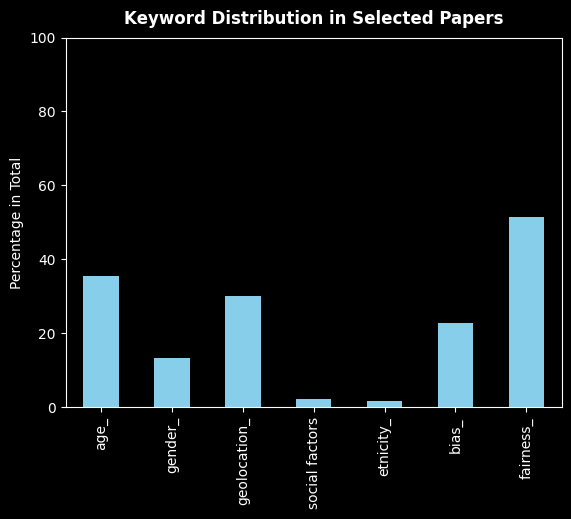

In [66]:
plot_category_percentage_binary(binary_df)

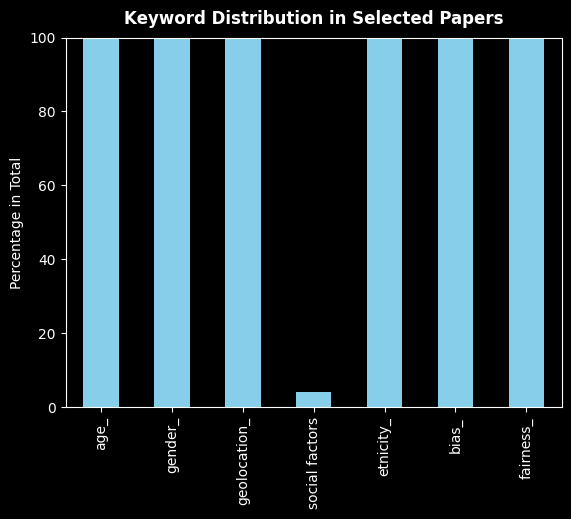

In [64]:
def plot_category_percentage_counts(df):    
    # Drop non-category columns
    df_categories = df.drop(['title'], axis=1)

    # Calculate the sum for each category
    category_sums = df_categories.sum()

    # Calculate the percentage for each category
    total_papers = len(df)  # The total number of papers
    category_percentages = (category_sums / total_papers) * 100

    # Create a bar plot with percentage values
    category_percentages.plot(kind='bar', stacked=False, color='skyblue').set_ylim(0, 100) # Set the y-axis limits to 0-100
    plt.title('Keyword Distribution in Selected Papers', fontsize=12, fontweight='bold', color='white', loc='center', pad=10, weight='bold',
              backgroundcolor='black', ha='center')
    plt.ylabel('Percentage in Total')
    plt.show()

In [88]:
# Drop non-category columns
df_categories = agg_counts_df.drop(['title'], axis=1)

# Calculate the sum for each category
category_sums = df_categories.sum()
print(category_sums)

# Calculate the percentage for each category
#for category in agg_counts_df.columns:

category_percentages = []    
total_word_count = 31220
for cat in category_sums:
    #total_word_count += cat  # The total count of words
    percentages = (cat / total_word_count) * 100
    category_percentages.append(percentages)


category_percentages

age_               2794
gender_            1552
geolocation_       1212
social factors        8
etnicity_          1810
bias_              7746
fairness_         16098
dtype: int64


[8.949391415759129,
 4.971172325432415,
 3.8821268417680974,
 0.025624599615631006,
 5.797565663036515,
 24.81101857783472,
 51.56310057655349]